# Random Forest


In [216]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Data
# X_train_df = pd.read_csv('gold/X_train_df.csv', index_col='respondent_id') # training set features
h1n1_X_train_df = pd.read_csv('../data/gold/h1n1_X_train_df.csv', index_col='respondent_id') # training set features
seasonal_X_train_df = pd.read_csv('../data/gold/seasonal_X_train_df.csv', index_col='respondent_id') # training set features


training_set_labels_df = pd.read_csv('../data/raw/training_set_labels.csv', index_col='respondent_id') # training set labels

# X_test_df = pd.read_csv('gold/X_test_df.csv', index_col='respondent_id') # test set features
h1n1_X_test_df = pd.read_csv('../data/gold/h1n1_X_test_df.csv', index_col='respondent_id') # test set features
seasonal_X_test_df = pd.read_csv('../data/gold/seasonal_X_test_df.csv', index_col='respondent_id') # test set features

submission_format_df = pd.read_csv('../data/raw/submission_format.csv', index_col='respondent_id') # submission format

In [217]:
h1n1_X_train, h1n1_X_test, h1n1_y_train, h1n1_y_test = train_test_split(h1n1_X_train_df, training_set_labels_df, test_size=0.2, random_state=42, stratify=training_set_labels_df)
seasonal_X_train, seasonal_X_test, seasonal_y_train, seasonal_y_test = train_test_split(seasonal_X_train_df, training_set_labels_df, test_size=0.2, random_state=42, stratify=training_set_labels_df)

In [218]:
# rfClassifier_h1n1 = RandomForestClassifier(random_state=42)
# rfClassifier_seasonal = RandomForestClassifier(random_state=42) 

In [219]:
# # Let's do GridSearchCV
# # parameters grid
# param_grid = {
#     "n_estimators": [50, 100, 200],
#     "criterion" : ["gini", "entropy"],
#     "max_depth" : [None, 5, 10, 20, 30],
#     "min_samples_split" : [2, 5, 10],
#     "min_samples_leaf": [1, 2, 4],
#     "class_weight" :['balanced', 'balanced_subsample'],
#     "bootstrap" : [True, False]            # Si usar o no remuestreo (bootstrap). 
#     # class weight should be balanced or balanced_subsample - we have imbalance issue.
# }

In [220]:
# # Initialize Grid Search
# grid_search_h1n1 = GridSearchCV(estimator=rfClassifier_h1n1, param_grid=param_grid,
#                            cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# # Fit the Grid Search model
# grid_search_h1n1.fit(h1n1_X_train, h1n1_y_train)

# # Print the best parameters and best score
# print("H1N1 Classifier: Best Parameters from Grid Search:", grid_search_h1n1.best_params_)
# print("H1N1 Classifier: Best cross-validation score (AUC):", grid_search_h1n1.best_score_)

# # Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
# # H1N1 Classifier: Best Parameters from Grid Search: {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
# # H1N1 Classifier: Best cross-validation score (AUC): 0.8148497538789563


In [221]:
# # Initialize Grid Search
# grid_search_seasonal = GridSearchCV(estimator=rfClassifier_seasonal, param_grid=param_grid,
#                            cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# # Fit the Grid Search model
# grid_search_seasonal.fit(seasonal_X_train, seasonal_y_train)

# # Print the best parameters and best score
# print("Seasonal Classifier: Best Parameters from Grid Search:", grid_search_seasonal.best_params_)
# print("Seasonal Classifier: Best cross-validation score (AUC):", grid_search_seasonal.best_score_)

# # Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
# # Seasonal Classifier: Best Parameters from Grid Search: {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
# # Seasonal Classifier: Best cross-validation score (AUC): 0.8202556895289412

  

In [222]:
h1n1_rf = RandomForestClassifier(random_state=42, bootstrap=True, class_weight= 'balanced_subsample', criterion='entropy', max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200)
seasonal_rf = RandomForestClassifier(random_state=42, bootstrap=False, class_weight= 'balanced', criterion='gini', max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200)

In [223]:
h1n1_rf.fit(h1n1_X_train, h1n1_y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=30, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [224]:
seasonal_rf.fit(seasonal_X_train, seasonal_y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [225]:
h1n1_preds = h1n1_rf.predict_proba(h1n1_X_test)
h1n1_preds

[array([[0.9666479 , 0.0333521 ],
        [0.35072234, 0.64927766],
        [0.81068038, 0.18931962],
        ...,
        [0.92043576, 0.07956424],
        [0.45643967, 0.54356033],
        [0.46754639, 0.53245361]]),
 array([[0.83467983, 0.16532017],
        [0.2655425 , 0.7344575 ],
        [0.71740506, 0.28259494],
        ...,
        [0.72423498, 0.27576502],
        [0.22217811, 0.77782189],
        [0.43745878, 0.56254122]])]

In [226]:
seasonal_preds = seasonal_rf.predict_proba(seasonal_X_test)
seasonal_preds

[array([[0.69782357, 0.30217643],
        [0.49271415, 0.50728585],
        [0.73149203, 0.26850797],
        ...,
        [0.80012576, 0.19987424],
        [0.52361333, 0.47638667],
        [0.56656568, 0.43343432]]),
 array([[0.50834942, 0.49165058],
        [0.24684348, 0.75315652],
        [0.75314076, 0.24685924],
        ...,
        [0.74134414, 0.25865586],
        [0.32041461, 0.67958539],
        [0.42145058, 0.57854942]])]

In [227]:
y_preds = pd.DataFrame(
    {
        'h1n1_vaccine': h1n1_preds[0][:,1],
        'seasonal_vaccine':seasonal_preds[1][:,1],
    },
    index=seasonal_y_test.index
)
print('y_preds.shape:', y_preds.shape)
y_preds.head()

y_preds.shape: (5342, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0.033352,0.491651
1215,0.649278,0.753157
10540,0.189320,0.246859
7407,0.413969,0.484668
14697,0.398681,0.490422


In [228]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0,1], [0,1], color='red', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

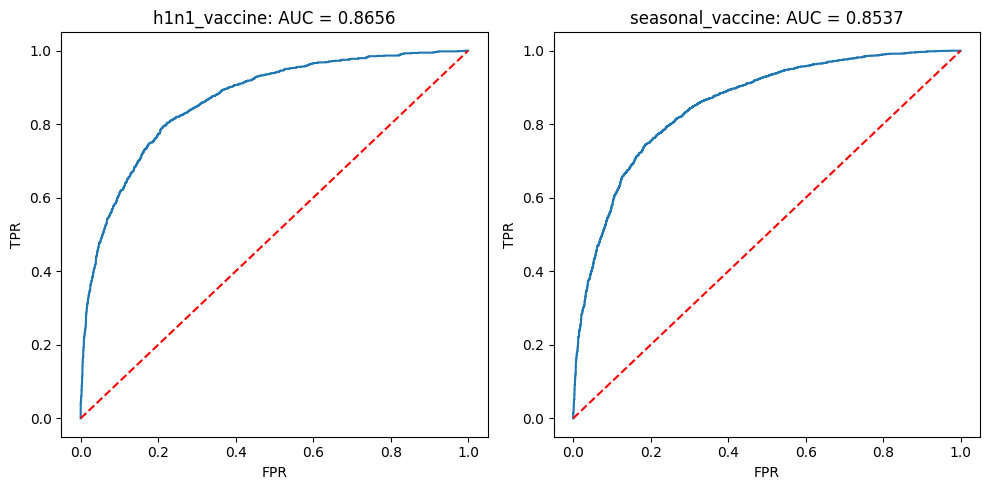

In [229]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

plot_roc(
    h1n1_y_test['h1n1_vaccine'],
    y_preds['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0])

plot_roc(
    seasonal_y_test['seasonal_vaccine'],
    y_preds['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1])

fig.tight_layout()

In [230]:
h1n1_rf.fit(h1n1_X_train_df, training_set_labels_df)
h1n1_preds = h1n1_rf.predict_proba(h1n1_X_test_df)
h1n1_preds

[array([[0.64883802, 0.35116198],
        [0.9133411 , 0.0866589 ],
        [0.53258844, 0.46741156],
        ...,
        [0.76309477, 0.23690523],
        [0.93258639, 0.06741361],
        [0.40643085, 0.59356915]]),
 array([[0.47000038, 0.52999962],
        [0.95655877, 0.04344123],
        [0.24835434, 0.75164566],
        ...,
        [0.67425621, 0.32574379],
        [0.58445432, 0.41554568],
        [0.4085891 , 0.5914109 ]])]

In [231]:
seasonal_rf.fit(seasonal_X_train_df, training_set_labels_df)
seasonal_preds = seasonal_rf.predict_proba(seasonal_X_test_df)
seasonal_preds

[array([[0.58881948, 0.41118052],
        [0.8675186 , 0.1324814 ],
        [0.58858156, 0.41141844],
        ...,
        [0.5119281 , 0.4880719 ],
        [0.71248752, 0.28751248],
        [0.33804915, 0.66195085]]),
 array([[0.60271706, 0.39728294],
        [0.89600865, 0.10399135],
        [0.28472774, 0.71527226],
        ...,
        [0.55050008, 0.44949992],
        [0.53315383, 0.46684617],
        [0.21845176, 0.78154824]])]

In [232]:
y_preds = pd.DataFrame(
    {
        'h1n1_vaccine': h1n1_preds[0][:,1],
        'seasonal_vaccine':seasonal_preds[1][:,1],
    },
    index=h1n1_X_test_df.index
)
print('y_preds.shape:', y_preds.shape)
y_preds.head()

y_preds.shape: (26708, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.351162,0.397283
26708,0.086659,0.103991
26709,0.467412,0.715272
26710,0.781384,0.916422
26711,0.501130,0.611626


In [233]:
y_preds.to_csv('../results/pred_random_forest_partition_output.csv', index = True)